In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create data

data = '/home/svincent/MAGnet/MAG_quality/All_MAGs_checkM_results.tsv'
#print(data)
df = pd.read_csv(data,sep='\t',index_col=0)
#print(df.head())

df['completeness'] = df['checkm2_completeness'].str.replace(',', '.').astype(float)
df['contamination'] = df['checkm2_contamination'].str.replace(',', '.').astype(float)

#print(df.head())

df['high_quality'] = (df['completeness'] >= 90) & (df['contamination'] <= 5)

print(df.head())
print(df.shape)

#df_2 = df[(df['completeness'] <= 100) & (df['completeness'] >= 40) & (df['contamination'] <= 40)]

#print(df_2.shape)

         checkm2_completeness checkm2_contamination  completeness  \
anvio_id                                                            
Bin_10                  78,68                 10,21         78.68   
Bin_23                  51,40                  5,76         51.40   
Bin_3                   81,98                  1,91         81.98   
Bin_26                  66,58                  0,85         66.58   
Bin_31                  76,66                  2,69         76.66   

          contamination  high_quality  
anvio_id                               
Bin_10            10.21         False  
Bin_23             5.76         False  
Bin_3              1.91         False  
Bin_26             0.85         False  
Bin_31             2.69         False  
(272, 5)


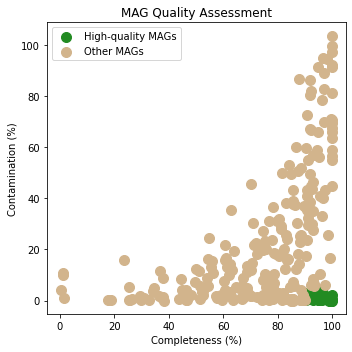

In [3]:
plt.figure(figsize=(5, 5))
for label, color in zip([True, False], ['forestgreen', 'tan']):
    subset = df[df['high_quality'] == label]
    plt.scatter(subset['completeness'], subset['contamination'],
                c=color, label='High-quality MAGs' if label else 'Other MAGs', s=100)

# Habillage du graphique
plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')
plt.title('MAG Quality Assessment')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.savefig('scatter-plot_MAG_qual.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# create data

data = '/home/svincent/MAGnet/MAG_quality/All_MAGs_checkM_results.tsv'
#print(data)
df3 = pd.read_csv(data,sep='\t',index_col=0)
#print(df.head())

df3['completeness'] = df3['checkm2_completeness'].str.replace(',', '.').astype(float)
df3['contamination'] = df3['checkm2_contamination'].str.replace(',', '.').astype(float)


#print(df.head())

df3['high_quality'] = (df3['completeness'] >= 90) & (df3['contamination'] <= 5)
df3['medium_quality'] = (df3['completeness'] >= 70) & (df3['contamination'] <= 10) & (~df3['high_quality'])
#print(df3.head())
#print(df3.shape)

df_filtered = df3[(df3['completeness'] <= 100) & (df3['completeness'] >= 50)]
print(df_filtered.head())

         checkm2_completeness checkm2_contamination  completeness  \
anvio_id                                                            
Bin_10                  78,68                 10,21         78.68   
Bin_23                  51,40                  5,76         51.40   
Bin_3                   81,98                  1,91         81.98   
Bin_26                  66,58                  0,85         66.58   
Bin_31                  76,66                  2,69         76.66   

          contamination  high_quality  medium_quality  
anvio_id                                               
Bin_10            10.21         False           False  
Bin_23             5.76         False           False  
Bin_3              1.91         False            True  
Bin_26             0.85         False           False  
Bin_31             2.69         False            True  


In [6]:
# Define categories
df_filtered['category'] = 'Low-quality'
df_filtered.loc[df_filtered['medium_quality'], 'category'] = 'Medium-quality'
df_filtered.loc[df_filtered['high_quality'], 'category'] = 'High-quality'

print(df_filtered.head())

         checkm2_completeness checkm2_contamination  completeness  \
anvio_id                                                            
Bin_10                  78,68                 10,21         78.68   
Bin_23                  51,40                  5,76         51.40   
Bin_3                   81,98                  1,91         81.98   
Bin_26                  66,58                  0,85         66.58   
Bin_31                  76,66                  2,69         76.66   

          contamination  high_quality  medium_quality        category  
anvio_id                                                               
Bin_10            10.21         False           False     Low-quality  
Bin_23             5.76         False           False     Low-quality  
Bin_3              1.91         False            True  Medium-quality  
Bin_26             0.85         False           False     Low-quality  
Bin_31             2.69         False            True  Medium-quality  


/tmp/ipykernel_129258/1471971494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = 'Low-quality'


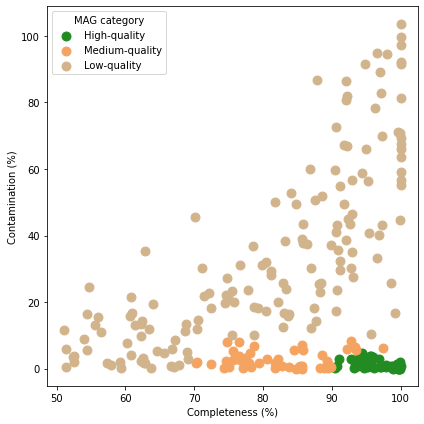

In [8]:
# Color map
colors = {
    'High-quality': 'forestgreen',
    'Medium-quality': 'sandybrown',
    'Low-quality': 'tan'
}

# Plot
plt.figure(figsize=(6, 6))
for category, color in colors.items():
    subset = df_filtered[df_filtered['category'] == category]
    plt.scatter(subset['completeness'], subset['contamination'],
                c=color, label=category, s=80)

# Formatting
plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')
#plt.title('MAG Quality Assessment')
plt.legend(title='MAG category')
plt.grid(False)
plt.tight_layout()
plt.savefig('scatter-plot_MAG_qual.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# create data

data_sample = '/home/svincent/MAGnet/MAG_quality/All_MAGs_checkM_results_sample.tsv'
#print(data)
df_3 = pd.read_csv(data_sample,sep='\t',index_col=0)
#print(df.head())

df_3['completeness'] = df_3['checkm2_completeness'].str.replace(',', '.').astype(float)
df_3['contamination'] = df_3['checkm2_contamination'].str.replace(',', '.').astype(float)

#print(df.head())

df_3['high_quality'] = (df_3['completeness'] >= 90) & (df_3['contamination'] <= 5)


#print(df_3.head())
#print(df_3.shape)

# Comptage par sample et statut de qualité
count_df_3 = df_3.groupby(['sample', 'high_quality']).size().unstack(fill_value=0)

# S'assurer que toutes les colonnes existent
count_df_3 = count_df_3.rename(columns={True: 'High quality', False: 'Medium quality'})

print(count_df_3)

high_quality  Medium quality  High quality
sample                                    
MX68_1_AU1                27             4
MX68_2_AV1                20             2
MX68_3_AW1                25             4
MX70_1_AK1                25             1
MX70_2_AL1                14             2
MX70_3_AM1                21             0
MX70_8_AR1                17             2
MX71_1_AA1                23             2
MX71_2_AB1                24             3
MX71_3_AC1                16             1
MX71_8_AH1                12             5


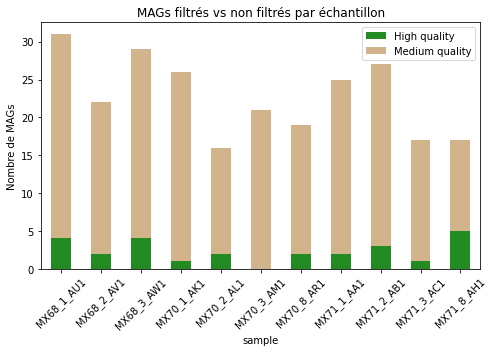

In [12]:
# Graphique en barres empilées
count_df_3[['High quality', 'Medium quality']].plot(kind='bar', stacked=True, color=['forestgreen', 'tan'], figsize=(7, 5))

# Mise en forme
plt.ylabel('Nombre de MAGs')
plt.title('MAGs filtrés vs non filtrés par échantillon')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('stacked_barplot_MAG_qual.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# create data

data = '/home/svincent/MAGnet/MAG_quality/All_MAGs_checkM_results_sample.tsv'
#print(data)
df3 = pd.read_csv(data,sep='\t',index_col=0)
#print(df.head())

df3['completeness'] = df3['checkm2_completeness'].str.replace(',', '.').astype(float)
df3['contamination'] = df3['checkm2_contamination'].str.replace(',', '.').astype(float)


#print(df.head())

df3['high_quality'] = (df3['completeness'] >= 90) & (df3['contamination'] <= 5)
df3['medium_quality'] = (df3['completeness'] >= 70) & (df3['contamination'] <= 10) & (~df3['high_quality'])
#print(df3.head())
#print(df3.shape)

df_filtered = df3[(df3['completeness'] <= 100) & (df3['completeness'] >= 50)]


# Define categories
df_filtered['category'] = 'Low-quality'
df_filtered.loc[df_filtered['medium_quality'], 'category'] = 'Medium-quality'
df_filtered.loc[df_filtered['high_quality'], 'category'] = 'High-quality'

print(df_filtered.head())

           anvio_id checkm2_completeness checkm2_contamination  completeness  \
sample                                                                         
MX68_3_AW1   Bin_10                78,68                 10,21         78.68   
MX71_1_AA1   Bin_23                51,40                  5,76         51.40   
MX68_8_BB1    Bin_3                81,98                  1,91         81.98   
MX70_2_AL1   Bin_26                66,58                  0,85         66.58   
MX70_3_AM1   Bin_31                76,66                  2,69         76.66   

            contamination  high_quality  medium_quality        category  
sample                                                                   
MX68_3_AW1          10.21         False           False     Low-quality  
MX71_1_AA1           5.76         False           False     Low-quality  
MX68_8_BB1           1.91         False            True  Medium-quality  
MX70_2_AL1           0.85         False           False     Low-quali

/tmp/ipykernel_129258/2538390842.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = 'Low-quality'


category    High-quality  Low-quality  Medium-quality
sample                                               
MX68_1_AU1             4           19               7
MX68_2_AV1             2           14               2
MX68_3_AW1             5           17               2
MX68_8_BB1             3           11               6
MX70_1_AK1             2           17               6


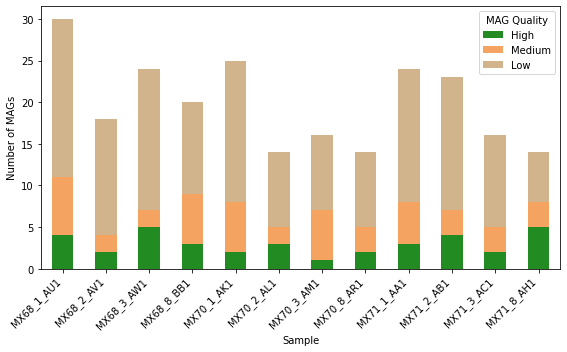

In [14]:
# Comptage par sample et statut de qualité
count_df_filtered = df_filtered.groupby(['sample', 'category']).size().unstack(fill_value=0)
print(count_df_filtered.head())

# Harmoniser les noms
count_df_filtered = count_df_filtered.rename(columns={
    'High-quality': 'High',
    'Medium-quality': 'Medium',
    'Low-quality': 'Low'
})

# Reorder and handle missing columns
for col in ['High', 'Medium', 'Low']:
    if col not in count_df_filtered.columns:
        count_df_filtered[col] = 0
count_df_filtered = count_df_filtered[['High', 'Medium', 'Low']]

colors = ['forestgreen', 'sandybrown', 'tan']  # high, medium, low

count_df_filtered.plot(kind='bar', stacked=True, color=colors, figsize=(8, 5))

plt.xlabel('Sample')
plt.ylabel('Number of MAGs')
#plt.title('MAG Quality Distribution per Sample')
plt.legend(title='MAG Quality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('stacked_bar_MAG_quality_category.png', dpi=300)
plt.show()